### Stock Market Prediction And Forecasting Using LSTM

In [177]:
!pip install scikit-learn





[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install tensorflow

In [ ]:
pip install --upgrade tensorflow

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow

In [127]:
df=pd.read_csv("C:\\Users\\ravip\\OneDrive\\Documents\\sem6\\EC460-deep learning and neural networks\\AAPL data.csv")

In [128]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-13,42.622501,43.142502,42.387501,42.737499,41.019913,127594400
1,2018-12-14,42.250000,42.270000,41.320000,41.369999,39.707378,162814800
2,2018-12-17,41.362499,42.087502,40.682499,40.985001,39.337849,177151600
3,2018-12-18,41.345001,41.882500,41.097500,41.517502,39.848949,135366000
4,2018-12-19,41.500000,41.862499,39.772499,40.222500,38.605984,196189200


In [129]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1187,2023-09-01,189.490005,189.919998,188.279999,189.460007,189.210739,45732600
1188,2023-09-05,188.279999,189.979996,187.610001,189.699997,189.450409,45280000
1189,2023-09-06,188.399994,188.850006,181.470001,182.910004,182.669342,81755800
1190,2023-09-07,175.179993,178.210007,173.539993,177.559998,177.326385,112488800
1191,2023-09-08,178.350006,180.240005,177.789993,178.179993,177.945557,65551300


In [130]:
df['Date'] = pd.to_datetime(df['Date'])
print(type(df['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [131]:
df1=df.reset_index()['Close']

In [132]:
df1

0        42.737499
1        41.369999
2        40.985001
3        41.517502
4        40.222500
           ...    
1187    189.460007
1188    189.699997
1189    182.910004
1190    177.559998
1191    178.179993
Name: Close, Length: 1192, dtype: float64

In [133]:
df_final=df1

--------------------------------------------------------------------------------------------------------------------------------

**Dataset of stock prices from Apple of 1192 Days from 	2018-12-13 to 	2023-09-08**

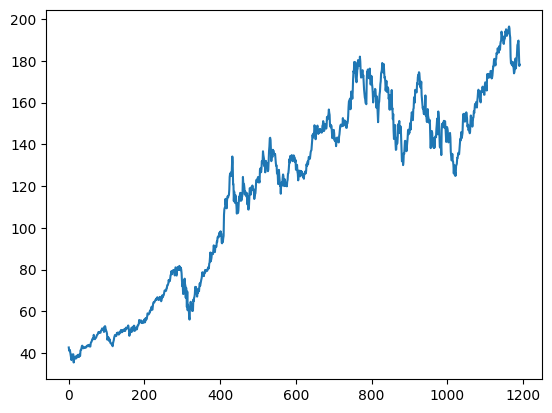

In [134]:
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [135]:
df1

0        42.737499
1        41.369999
2        40.985001
3        41.517502
4        40.222500
           ...    
1187    189.460007
1188    189.699997
1189    182.910004
1190    177.559998
1191    178.179993
Name: Close, Length: 1192, dtype: float64

In [136]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [137]:
print(df1)

[[0.04468543]
 [0.0361865 ]
 [0.03379376]
 ...
 [0.9158497 ]
 [0.88259971]
 [0.88645295]]


--------------------------------------------------------------------------------------------------------------------------------

**Splitting dataset into train and test data**

In [138]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [139]:
training_size,test_size
print(training_size,test_size)
print(training_size/(training_size+test_size))
print(test_size/(training_size+test_size))

774 418
0.6493288590604027
0.35067114093959734


In [140]:
train_data

array([[0.04468543],
       [0.0361865 ],
       [0.03379376],
       [0.03710322],
       [0.02905486],
       [0.02274669],
       [0.01326889],
       [0.00720933],
       [0.02327496],
       [0.02169014],
       [0.02181444],
       [0.02416059],
       [0.02444026],
       [0.        ],
       [0.00943117],
       [0.00891843],
       [0.01329997],
       [0.01727753],
       [0.01803887],
       [0.01569271],
       [0.01213467],
       [0.01690465],
       [0.01981013],
       [0.02123956],
       [0.02273116],
       [0.01726201],
       [0.01822532],
       [0.01632975],
       [0.02419166],
       [0.02192321],
       [0.01940614],
       [0.03582915],
       [0.0376781 ],
       [0.0378024 ],
       [0.04515156],
       [0.049704  ],
       [0.04979724],
       [0.04466991],
       [0.04384643],
       [0.04232375],
       [0.04459222],
       [0.04348905],
       [0.04445239],
       [0.04386196],
       [0.04465435],
       [0.04636348],
       [0.04485635],
       [0.047

In [141]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [142]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [143]:
print(X_train.shape)
print(y_train.shape)

(673, 100)
(673,)


In [144]:
print(X_test.shape), print(ytest.shape)

(317, 100)
(317,)


(None, None)

In [145]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

-------------------------------------------------------------------------------------------------------------------------------

**Building the LSTM Model**

In [146]:
import tensorflow
from tensorflow.keras import layers 

In [147]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

model = Sequential()
model.add(Input(shape=(100, 1)))# Input layer specifying input shape
model.add(LSTM(50, return_sequences=True))
#model.add(layers.BatchNormalization())
model.add(LSTM(50, return_sequences=True))
#model.add(layers.BatchNormalization())
model.add(LSTM(50))
#model.add(layers.BatchNormalization())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')



In [149]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

-------------------------------------------------------------------------------------------------------------------------------

**Training and testing the model**

In [150]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 308ms/step - loss: 0.0711 - val_loss: 0.0456
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - loss: 0.0114 - val_loss: 0.0051
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - loss: 0.0018 - val_loss: 0.0034
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - loss: 0.0011 - val_loss: 0.0023


In [151]:
import tensorflow as tf

In [152]:
tf.__version__

'2.16.1'

In [153]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [154]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [155]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
math.sqrt(mean_squared_error(y_train,train_predict))

108.68561425762088

In [156]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

158.31699144942678

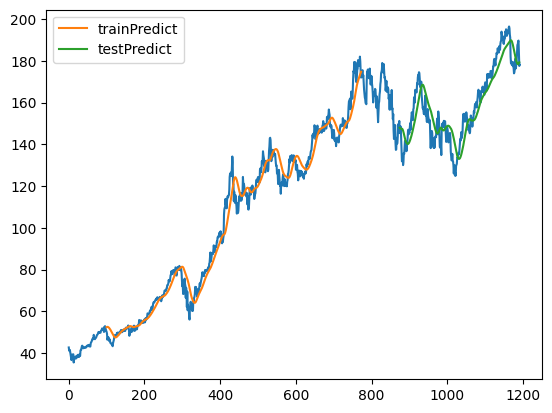

In [157]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot,label='trainPredict')
plt.plot(testPredictPlot,label='testPredict')
plt.legend()
plt.show()

In [158]:
len(test_data)

418

--------------------------------------------------------------------------------------------------------------------------------

**Predicting the stock price for nxt 30 days**

In [159]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 77)

In [160]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [161]:
temp_input

[0.8676838860225016,
 0.8617174962904244,
 0.8453100503798276,
 0.847050222266285,
 0.8541974637857701,
 0.8693618525345934,
 0.8809838599396247,
 0.8806730940954455,
 0.8983235101585996,
 0.9036683682023181,
 0.8951539260149204,
 0.8928544278144699,
 0.8842156556726133,
 0.9013067516367181,
 0.9037305797916275,
 0.9213187842654724,
 0.9183356422264577,
 0.9223132001631598,
 0.9351159723463831,
 0.9283417020454425,
 0.9289010283594359,
 0.9223754117524692,
 0.9412687979681809,
 0.9392799723877499,
 0.930516969730538,
 0.947856626164457,
 0.9552524219388121,
 0.9573654780345984,
 0.9845869637721469,
 0.9752024356415205,
 0.9681795178615504,
 0.971162666115509,
 0.9641397483355387,
 0.9512748640021098,
 0.9479809499039717,
 0.9584842176718007,
 0.9632696561773662,
 0.964201953709904,
 0.9847112875116619,
 0.9830953461405596,
 0.9916098815521173,
 0.9793664356828873,
 0.971970633693588,
 0.9770047258931274,
 0.9824116960870515,
 0.987880877870285,
 0.9799257557819365,
 0.9961467658028129,

In [162]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30:

    if len(temp_input) > 100:
        x_input = array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = array(temp_input)
        x_input = x_input.reshape((1, len(temp_input), -1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


[0.8972957]
78
[0.8987118]
79
[0.8996778]
80
[0.9002356]
81
[0.9004485]
82
[0.90038544]
83
[0.90011233]
84
[0.89968675]
85
[0.8991567]
86
[0.89855903]
87
[0.89792156]
88
[0.89726454]
89
[0.8966013]
90
[0.8959409]
91
[0.89528847]
92
[0.89464676]
93
[0.89401674]
94
[0.8933989]
95
[0.8927927]
96
[0.89219743]
97
[0.89161193]
98
[0.8910359]
99
[0.8904683]
100
[0.8899089]
101
24 day input [0.8617175  0.84531005 0.84705022 0.85419746 0.86936185 0.88098386
 0.88067309 0.89832351 0.90366837 0.89515393 0.89285443 0.88421566
 0.90130675 0.90373058 0.92131878 0.91833564 0.9223132  0.93511597
 0.9283417  0.92890103 0.92237541 0.9412688  0.93927997 0.93051697
 0.94785663 0.95525242 0.95736548 0.98458696 0.97520244 0.96817952
 0.97116267 0.96413975 0.95127486 0.94798095 0.95848422 0.96326966
 0.96420195 0.98471129 0.98309535 0.99160988 0.97936644 0.97197063
 0.97700473 0.9824117  0.98788088 0.97992576 0.99614677 1.
 0.99477947 0.9759482  0.9671851  0.91013196 0.89061704 0.89652122
 0.88651515 0.88514

In [163]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [164]:
import matplotlib.pyplot as plt

In [165]:
len(df1)

1192

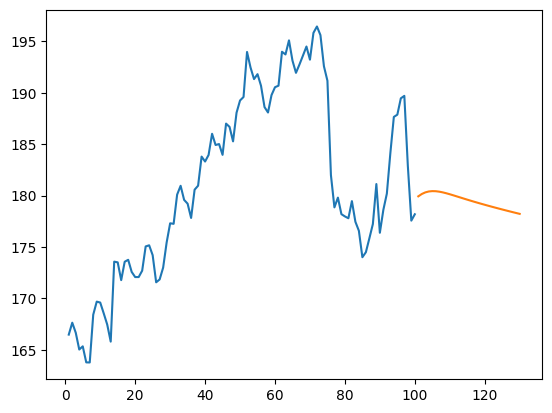

In [166]:
plt.plot(day_new,scaler.inverse_transform(df1[1092:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

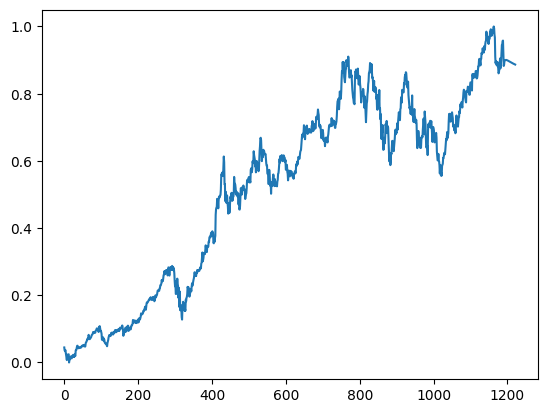

In [167]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3)

In [168]:
df3=scaler.inverse_transform(df3).tolist()

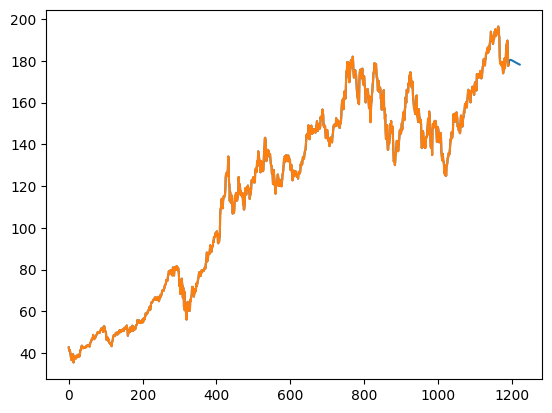

In [169]:
plt.plot(df3)
plt.plot(df_final)

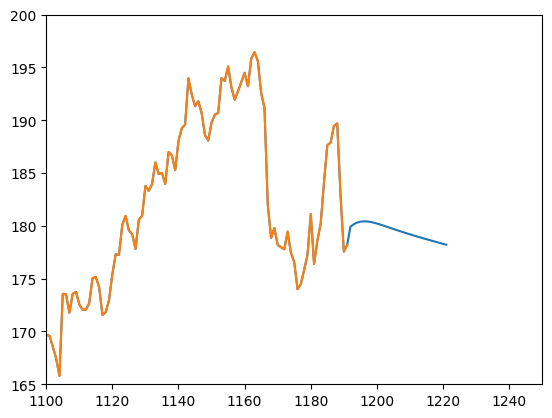

In [170]:
plt.xlim(1100,1250)
plt.ylim(165,200)
plt.plot(df3)
plt.plot(df_final)


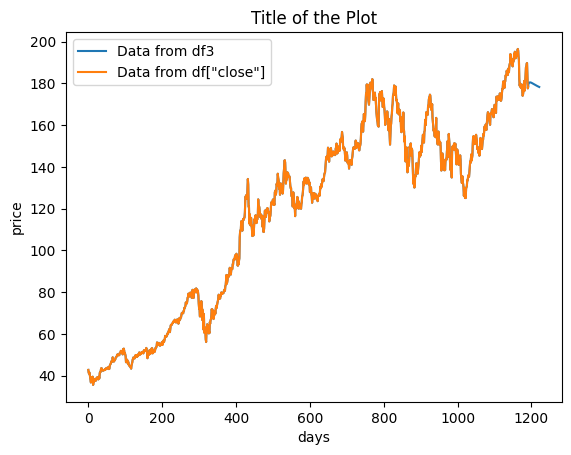

In [171]:
import matplotlib.pyplot as plt

# Assuming df3 and df["close"] are two dataframes or arrays that you want to plot

plt.plot(df3, label='Data from df3')
plt.plot(df["Close"], label='Data from df["close"]')

# Add labels and title
plt.xlabel('days')
plt.ylabel('price')
plt.title('Title of the Plot')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [172]:
df4=pd.read_csv("C:\\Users\\ravip\\OneDrive\\Documents\\sem6\\EC460-deep learning and neural networks\\AAPL prediction.csv")

In [173]:
df4

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-11,145.820007,150.009995,144.369995,149.699997,148.867905,93979700
1,2022-11-14,148.970001,150.279999,147.429993,148.279999,147.455780,73374100
2,2022-11-15,152.220001,153.589996,148.559998,150.039993,149.206009,89868300
3,2022-11-16,149.130005,149.869995,147.289993,148.789993,147.962952,64218300
4,2022-11-17,146.429993,151.479996,146.149994,150.720001,149.882233,80389400
...,...,...,...,...,...,...,...
246,2023-11-06,176.380005,179.429993,176.210007,179.229996,178.994186,63841300
247,2023-11-07,179.179993,182.440002,178.970001,181.820007,181.580780,70530000
248,2023-11-08,182.350006,183.449997,181.589996,182.889999,182.649368,49340300
249,2023-11-09,182.960007,184.119995,181.809998,182.410004,182.169998,53763500


In [174]:
actual_data=df4[196:226]["Close"]
actual_data

196    178.610001
197    180.190002
198    184.119995
199    187.649994
200    187.869995
201    189.460007
202    189.699997
203    182.910004
204    177.559998
205    178.179993
206    179.360001
207    176.300003
208    174.210007
209    175.740005
210    175.009995
211    177.970001
212    179.070007
213    175.490005
214    173.929993
215    174.789993
216    176.080002
217    171.960007
218    170.429993
219    170.690002
220    171.210007
221    173.750000
222    172.399994
223    173.660004
224    174.910004
225    177.490005
Name: Close, dtype: float64

In [175]:
predicted_data=df3[-31:-1]
predicted_data

[[178.17999299999997],
 [179.92462094013212],
 [180.15247289721296],
 [180.30790671607016],
 [180.3976549530582],
 [180.4319123480701],
 [180.42176556085775],
 [180.37782172436712],
 [180.30934529648778],
 [180.22405665879438],
 [180.12789235314366],
 [180.02532156936644],
 [179.91960508974265],
 [179.8128911943626],
 [179.70662805418013],
 [179.60165004583737],
 [179.4983983339958],
 [179.39702636723325],
 [179.29761086983868],
 [179.20007511752317],
 [179.10429443331716],
 [179.01008659703444],
 [178.9174036559944],
 [178.82607298054694],
 [178.7360657990837],
 [178.64719989141844],
 [178.5594944386234],
 [178.4728823069458],
 [178.38726759102437],
 [178.30274619622037]]

--------------------------------------------------------------------------------------------------------------------------------

**Checking the errors and difference between predicted and Actual values of Stock**

In [176]:
mse=mean_squared_error(actual_data,predicted_data)
mae=mean_absolute_error(actual_data,predicted_data)
rmse=math.sqrt(mse)
print("MSE is {: .9f}" .format(mse))
print("RMSE is {: .9f}" .format(rmse))
print("MAE is {: .9f}" .format(mae))

MSE is  27.170851042
RMSE is  5.212566646
MAE is  4.473661423
